In [201]:
import re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_list = []

#If you need to place a header on the data, could do this:
#data_list.append(['username','ip','date'])

file = open("loginrep.txt","r")
for line in file:
    line_list = line.split()
    if "Invalid" in line_list[5]:
        ndo = datetime.strptime(line_list[0] + ' ' + line_list[1] + ' 2020 ' + line_list[2],'%b %d %Y %H:%M:%S')
        newrow = [line_list[7],line_list[9],ndo]
        data_list.append(newrow)

file.close()

headers = ['username','ip','date']
df = pd.DataFrame(data_list,columns=headers)

#set the index of the dataframe to the date.  
# It is not guaranteed unique in this case though.
df.index = df.date
df = df.drop(columns=["date"])
df

,username,ip
date,,
2020-02-02 06:27:46,oracle,36.22.187.34
2020-02-02 06:29:50,musicbot,128.199.133.128
2020-02-02 06:31:30,testftp,138.68.94.173
2020-02-02 06:35:17,test,51.15.46.184
2020-02-02 07:04:24,hadoop,46.153.109.68
...,...,...
2020-02-07 10:09:19,vcw,103.228.183.10
2020-02-07 10:13:02,zxh,211.159.241.77
2020-02-07 10:14:45,lbx,122.51.57.78


In [202]:
udf = df['username'].value_counts().to_frame()
udf = udf.where(udf.values >= 10).dropna()
udf.index.name = 'username'
udf.rename(columns={'username':'count'})

,count
username,
test,30.0
123456,27.0
admin,27.0
oracle,24.0
ubuntu,15.0
testuser,12.0


In [203]:
uniqueIp = df['ip'].value_counts().to_frame()
ipdf = uniqueIp.where(uniqueIp > 9).dropna()
ipdf
ipdf.index.name = 'IP'
ipdf.rename(columns={'ip':'count'})

,count
IP,
219.138.156.233,98.0
162.243.121.211,98.0
129.226.57.194,93.0
103.79.154.104,89.0
177.23.196.77,87.0
31.211.65.102,85.0
87.97.116.44,84.0
87.120.36.234,81.0
101.255.56.42,78.0


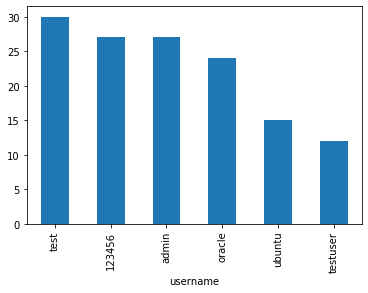

In [204]:
udf.plot.bar(legend=False)

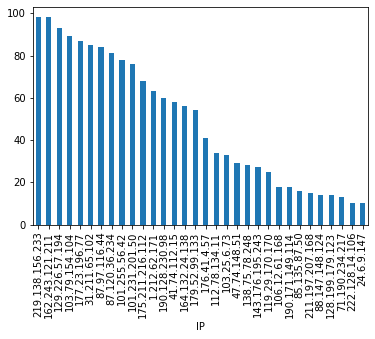

In [205]:
ipdf.plot.bar(legend=False)